# Bibliotecas

In [23]:
#library para plot do grafo
import networkx as nx
#layout tipo arvore
from networkx.drawing.nx_pydot import graphviz_layout

#library para plot do grafo
import matplotlib.pyplot as plt

#biblioteca random
import random

## Exercício 1:

Gerar grafos aleatórios com branching factor b e profundidade d com valor para os elementos da sua base aleatórios de -10 até 10.

a) Para um dado depth factor `d` e para um Branching factor `b`, gere um codigo em python que produza um grafo, representando-o no formato lista de tuplas.

Ex: `[(1,2),(1,4), (4,5)....]`

Para o caso acima o nó 1 tem uma ligação com o nó dois e 4. O nó 4 tem uma ligação com o nó 5.

In [120]:
# d - depth
# b - branching factor 

def convert_list_to_tuple(list):
    return tuple(i for i in list)

# Graf em formato lista de tuplas, ligações entre os nós
def generate_graf(graf,d,b):
    
    # Total number of nodes = (branching factor ^ (depth + 1) - 1) / (branching factor - 1)
    num_nodes = (pow(b,d+1)-1)/(b-1)
    num_nodes = int(num_nodes)
    print(num_nodes)
    
    list_of_nodes = [i for i in range(1,num_nodes+1)]
    print(list_of_nodes)
	
    while d > 0:
        pai = list_of_nodes.pop(0)
        for i in range(1,b+1):
            filho = list_of_nodes.pop(0)
            graf.append((pai,filho))
        # print(value)
        # print(convert_list_to_tuple(value))
        # print(graf)
        # print("---")
        d-=1
    return graf

g=generate_graf([],2,2)

print(g)
    


7
[1, 2, 3, 4, 5, 6, 7]
d = 2
pai =  1
d = 1
pai =  4
[(1, 2), (1, 3), (4, 5), (4, 6)]


b) Em seguinda atribua um valor (utility) ou um valor para os nós na base do grafo. Use um dicionário `labels_dic` para faze-lo. Comece aqui a trabalhar com a biblioteca `networkx` ela é especializada em grafos. (Dica: pesquise o método `.degree` de um grafo)

Ex: `{1:'', 2:'', 9:'',...}`

In [ ]:
labels = {}

G = nx.DiGraph()



[1, -10, 2, 8, 10, 5, -4, 7, -3, -5]
1 : [-10, -4, -5, 8]
-10 : [2, 10]
2 : [-10, 8]
8 : []
10 : [8, 5, 7, -3]
5 : []
-4 : [10, 1]
7 : []
-3 : []
-5 : []


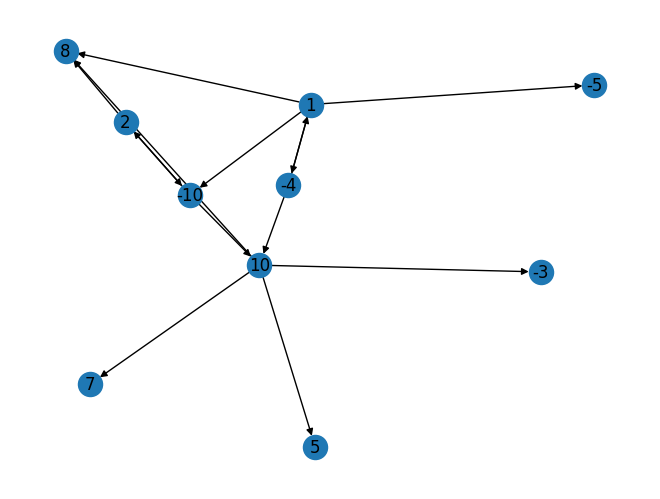

In [61]:
G = nx.DiGraph()

def print_graf_dict(graf_dict):
	for key in graf_dict:
		print(key, ":", graf_dict[key])

def add_nodes(G, depth, branch_factor, parent_node):
    if depth == 0:
        return
    for i in range(branch_factor):
        child_node = random.randint(-10,10)
        while child_node == parent_node: # nao ligar no child com o proprio parente
            child_node = random.randint(-10,10)
            G.add_node(child_node)
        G.add_edge(parent_node, child_node)
        add_nodes(G, depth - 1, branch_factor, child_node)

# Create the root node (node 1)
root_node = 1
G.add_node(root_node)

# Call the function to add nodes and edges recursively
depth = 3
branch_factor = 2
add_nodes(G, depth, branch_factor, root_node)

print(G.nodes())

graf_dict = nx.to_dict_of_lists(G)
print_graf_dict(graf_dict)

nx.draw(G, with_labels=True)
plt.show()



[3, 6, -9, -7, -4, -3, -2]


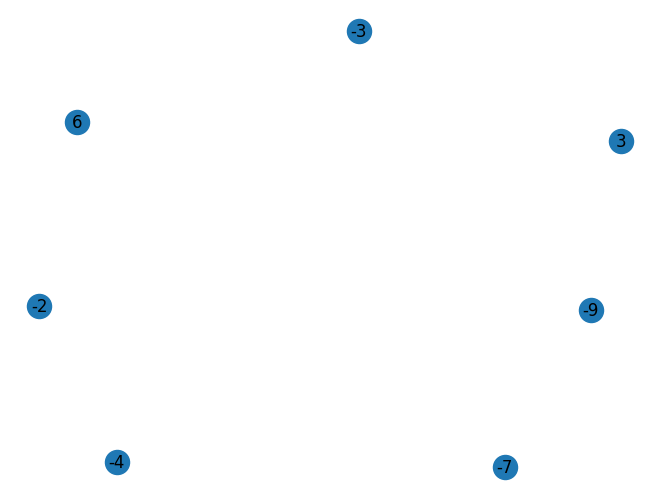

In [39]:
# DELETE THIS JUST FOR TESTING

G = nx.Graph()

# ----

# Criei uma lista com todos os valores do grafo
joined_list = [item for sublist in g for item in sublist]

# unicos da-nos os valores unicos da lista (sem repetições)
unicos=set(joined_list)
unicos=list(unicos)

# 
print(unicos)

# ----

# Adiciona nos unicos ao grafo 
# MAS ASSIM NAO SEI QUAIS SAO AS LIGAÇÕES
G.add_nodes_from(unicos)

nx.draw(G, with_labels=True)
plt.show()

c) Agora vamos tentar imprimir o que gerou. Também faz parte tentar receber funções de outros programadores e tentar atender os parametros de entrada. Utilizando a funcao dada abaixo atenda os requisitos do input e veja o que acontece.

In [63]:
#funcao que printa o grafo

# def tree_graph(d,b):

def print_grafo(graph,labels_dic,values=False):
	
  #parametros e entrada
  ######
  #list_edges deve ser uma lista de tuplas
  #list_edges = [(1,2),(3,4)....]
  #Cada edge representa uma ligacao entre nós
  #values (default False) é se quer imprimir o grafo com os nomes dos nós ou com seus valores atribuidos
  ######
  #labels_dic é um dicionário com o peso de cada nó
  #labels_dic = {1:4,2:2,3:5,....}

  #cria o node
  G = nx.DiGraph()

  #insere os nós e os edges
  G.add_edges_from(graph)

  #gera a posicao e organiza em arvore
  pos = graphviz_layout(G, prog="dot")

  for node in G:
    G.nodes[node]["value"] = labels_dic[node]

  # Printa a informacao do grafo (opcional)
  print("Nodes:", G.nodes(data=True))
  print("Edges:", G.edges())

  #faz plot
  if values:
    nx.draw(G, pos,with_labels=True,labels=labels_dic)
  else:
    nx.draw(G,pos,with_labels=True)

  plt.draw()
  plt.show()

  return G


G = print_grafo(tree_graph,labels_dic,True)

NameError: name 'tree_graph' is not defined

## Exercício 2:

Agora ja tem um bom grafo para trabalhar com minimax. crie uma função que receba como parâmetro o grafo que você criou acima, nó alvo e qual comportamento de jogador esse nó deve ter (max ou min). Sua função deve retornar qual jogada o jogador deve fazer logo a seguir o nó alvo.

In [34]:
'''

Pseudo-code for MinMax Algorithm:
    
function minimax(node, depth, maximizingPlayer) is  
	if depth == 0 or node is a terminal node then  
		return static evaluation of node  
  
	if MaximizingPlayer then // for Maximizer Player  
		maxEva = -infinity            
 		for each child of node do  
 			eva = minimax(child, depth - 1, false)  
			maxEva = max(maxEva,eva) // gives Maximum of the values  
		return maxEva  

	else // for Minimizer player  
 		minEva = +infinity   
 		for each child of node do  
 			eva = minimax(child, depth - 1, true)  
 			minEva = min(minEva, eva) //gives minimum of the values  
 		return minEva  

 '''

'\n\nPseudo-code for MinMax Algorithm:\n    \nfunction minimax(node, depth, maximizingPlayer) is  \n\tif depth ==0 or node is a terminal node then  \n\t\treturn static evaluation of node  \n  \n\tif MaximizingPlayer then // for Maximizer Player  \n\t\tmaxEva= -infinity            \n \t\tfor each child of node do  \n \t\t\teva= minimax(child, depth-1, false)  \n\t\t\tmaxEva= max(maxEva,eva) // gives Maximum of the values  \n\t\treturn maxEva  \n  \n\telse // for Minimizer player  \n \t\tminEva= +infinity   \n \t\tfor each child of node do  \n \t\t\teva= minimax(child, depth-1, true)  \n \t\t\tminEva= min(minEva, eva)         //gives minimum of the values  \n \t\treturn minEva  \n   \n '

In [ ]:
# print("Nodes:", G.nodes(data=True))
# print("Edges:", G.edges())

Nodes: [(0, {'value': ''}), (1, {'value': ''}), (2, {'value': ''}), (3, {'value': 4}), (4, {'value': 3}), (5, {'value': ''}), (6, {'value': 6}), (7, {'value': 9}), (8, {'value': ''}), (9, {'value': ''}), (10, {'value': 7}), (11, {'value': 4}), (12, {'value': ''}), (13, {'value': -9}), (14, {'value': 10})]
Edges: [(0, 1), (0, 8), (1, 2), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7), (8, 9), (8, 12), (9, 10), (9, 11), (12, 13), (12, 14)]


In [ ]:
def minimax(graf, node, maximizingPlayer):
    

## Exercício 3:

Que melhoria você propoe para o seu codigo acima? Discuta isso com o professor e veja sobre Alpha Beta Pruning. Implemente a rotina no seu código acima. O valor muda? O que muda?